# TP Final - Análisis de Datos

#### Alumnos: Santiago Gonzalez Achaval, Leandro Albachiaro y Scordamaglia Ezequiel

#### Dataset Elegido: Rain in Australia

##### Objetivo: Determinar si va a llover el dia de mañana


In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [416]:
#CARGAMOS EL DATASET
url = '.\data\weatherAUS.csv'
weather = pd.read_csv(url, delimiter = ',')
pd.set_option('display.max_columns', None)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## ANÁLISIS EXPLORATORIO

In [417]:
#COLUMNAS
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Explicacion de las Columnas

- `Date`: La fecha de observación
- `Location`: El nombre común de la ubicación de la estación meteorológica.
- `MinTemp`: La temperatura mínima en grados centígrados
- `MaxTemp`: La temperatura máxima en grados centígrados
- `Rainfall`: La cantidad de lluvia registrada para el día en mm
- `Evaporation`: La llamada evaporación de bandeja Clase A (mm) en las 24 horas a las 9 a.m.
- `Sunshine`: El número de horas de sol brillante en el día.
- `WindGustDir`: La dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche
- `WindGustSpeed`: La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche
- `WindDir9am`: Dirección del viento a las 9am
- `WindDir3pm`: Dirección del viento a las 15:00
- `WindSpeed9am`: Velocidad del viento (km/h) promediada durante 10 minutos antes de las 9 a.m.
- `WindSpeed3pm`: Velocidad del viento (km/h) promediada durante 10 minutos antes de las 3:00 p. m.
- `Humidity9am`: Humedad (porcentaje) a las 9 a. m.
- `Humidity3pm`: Humedad (porcentaje) a las 15:00
- `Pressure9am`: Presión atmosférica (hpa) reducida al nivel medio del mar a las 9 a. m.
- `Pressure3pm`: Presión atmosférica (hpa) reducida al nivel medio del mar a las 3 p. m.
- `Cloud9am`: Fracción de cielo oscurecida por nubes a las 9 a.m. Esto se mide en "octas", que son una unidad de octavos.
- `Cloud3pm`: Fracción de cielo oscurecida por nubes (en "octas": octavos) a las 15:00 horas. Ver Cload9am para una
- `Temp9am`: Temperatura (grados C) a las 9 am
- `Temp3pm`: Temperatura (grados C) a las 3pm
- `RainToday`: Booleano: 1 si la precipitación (mm) en las 24 horas hasta las 9 am excede 1 mm, de lo contrario 0
- `RainTomorrow`: Booleano: 1 si la precipitación (mm) del dia siguiente excede 1 mm, de lo contrario 0.


In [418]:
#TIPOS DE DATO DE LAS COLUMNAS
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [419]:
#INFORMACION DE LAS COLUMNAS
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [420]:
# CANTIDAD DE DATOS
weather.shape

(145460, 23)

## DATOS CATEGÓRICOS

In [421]:
#COLUMNAS CON DATOS CATEGORICOS
weather.select_dtypes(include=['object']).head(10)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
5,2008-12-06,Albury,WNW,W,W,No,No
6,2008-12-07,Albury,W,SW,W,No,No
7,2008-12-08,Albury,W,SSE,W,No,No
8,2008-12-09,Albury,NNW,SE,NW,No,Yes
9,2008-12-10,Albury,W,S,SSE,Yes,No


In [422]:
# CANTIDAD DE VALORES NULOS EN VARIABLES CATEGORICAS
categorical_columns = weather.select_dtypes(include=['object']).columns

weather[categorical_columns].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [423]:
#PORCENTAJE DE VALORES NULOS EN COLUMNAS
for col in weather.columns:
    if weather[col].isnull().mean()>0:
        print(col, round((weather[col].isnull().mean())*100,4), "%")

MinTemp 1.0209 %
MaxTemp 0.8669 %
Rainfall 2.2419 %
Evaporation 43.1665 %
Sunshine 48.0098 %
WindGustDir 7.0989 %
WindGustSpeed 7.0555 %
WindDir9am 7.2639 %
WindDir3pm 2.9066 %
WindSpeed9am 1.2148 %
WindSpeed3pm 2.105 %
Humidity9am 1.8246 %
Humidity3pm 3.0984 %
Pressure9am 10.3568 %
Pressure3pm 10.3314 %
Cloud9am 38.4216 %
Cloud3pm 40.8071 %
Temp9am 1.2148 %
Temp3pm 2.4811 %
RainToday 2.2419 %
RainTomorrow 2.246 %


### Columna Date
- Es una variable compuesta de 3 datos: Año, Mes y Dia. Se podrían serpar en tres columnas nuevas.

### Columna Location

In [424]:
weather['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [425]:
# CANTIDAD DE MUESTRAS EN CADA CIUDAD
weather['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

### Columnas de Direccion del viento

### WindGustDir

In [426]:
print(weather['WindGustDir'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']


In [427]:
weather['WindGustDir'].value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

### WindDir9am

In [428]:
print(weather['WindDir9am'].unique())

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']


In [429]:
weather['WindDir9am'].value_counts()

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

### WindDir3pm

In [430]:
print(weather['WindDir3pm'].unique())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


In [431]:
weather['WindDir3pm'].value_counts()

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

### Columna RainToday

In [432]:
weather['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [433]:
weather['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

### Columna RainTomorrow

In [434]:
weather['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [435]:
counts = weather['RainTomorrow'].value_counts()
counts

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

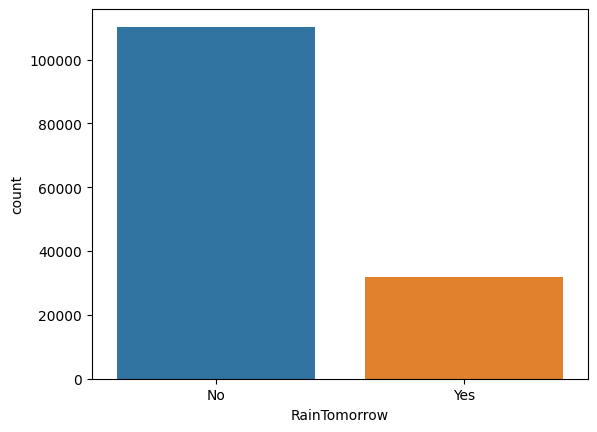

In [436]:
#PROPORCIÓN DE DÍAS DE LLUVIA
sns.countplot(x='RainTomorrow', data=weather)

In [437]:
# PORCENTAJE DE CASOS POSITIVOS FRENTE A LOS NEGATIVOS DEL DATASET COMPLETO
percentages = counts / counts.sum() * 100
percentages

RainTomorrow
No     77.581878
Yes    22.418122
Name: count, dtype: float64

In [438]:
#REGISTROS EN LOS QUE LA VARIABLE OBJETIVO NO TIENE VALOR
weather[weather['RainTomorrow'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,6.0,13.0,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,6.0,11.0,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,9.0,7.0,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,6.0,11.0,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,2016-02-07,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,33.0,26.0,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,2016-06-22,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,2016-06-23,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,9.0,NaN,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,2017-02-21,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,24.0,7.0,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


<div style="color:red; background-color:white; font-size:20px; padding:10px">

PREGUNTA: Conviene borrar los registros en los que la variable objetivo tiene valor nulo?
Vemos que solo son 3267 casos sobre 145460 registros.

</div>

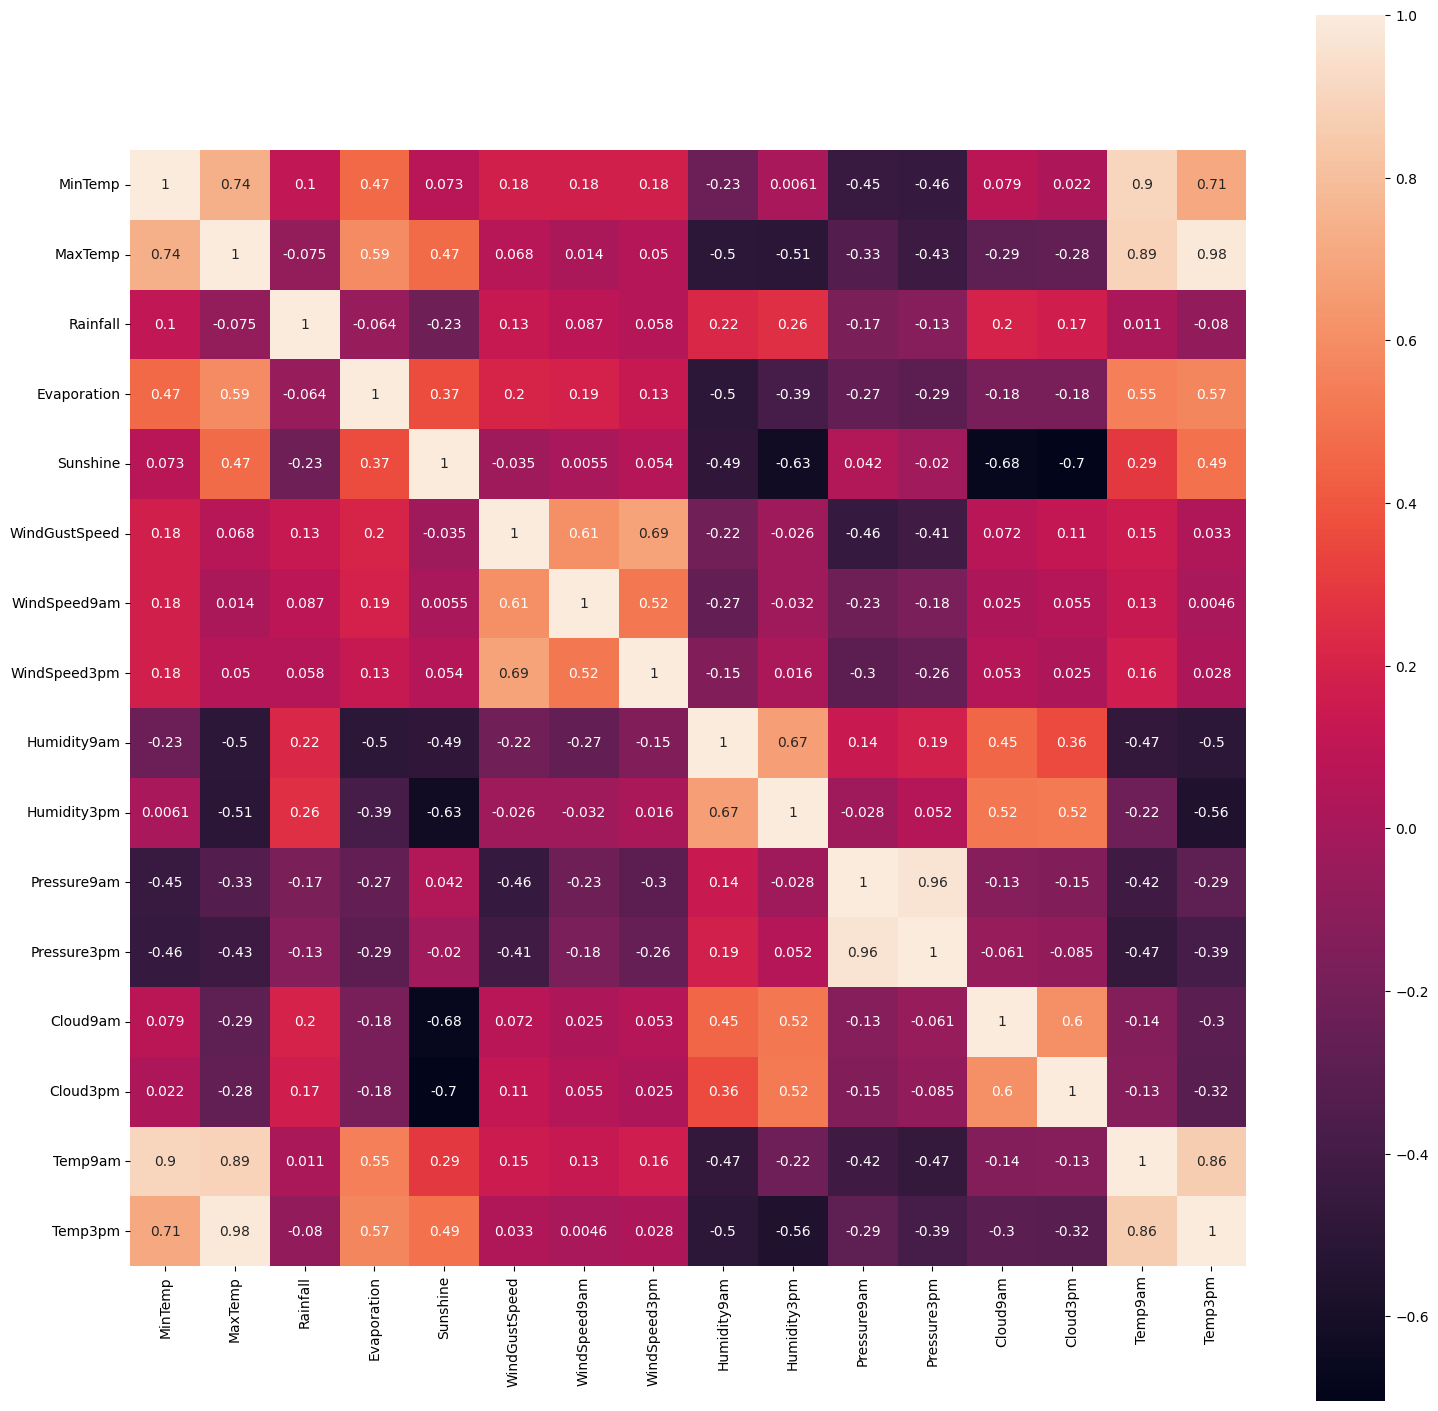

In [439]:
#MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
numerical_columns = weather.select_dtypes(include=['float64', 'int64'])
# crear la matriz de correlación
corr_matrix = numerical_columns.corr()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
sns.heatmap(corr_matrix,square = True, ax = ax, annot=True)
ax.tick_params(labelsize = 10)

#### Los valores más oscuros del heatmap corresponden a valores de correlación más bajos

## PREPROCESAMIENTO DE LOS DATOS

In [440]:
#BORRAR FEATURES CON GRAN CANTIDAD DE VALORES NULOS
# Evaporation 43.1665 %
# Sunshine 48.0098 %
# Cloud9am 38.4216 %
# Cloud3pm 40.8071 %
# RainToday (Tenemos mas información en la columa RainFall)
# Temp9am (Tiene una alta correlación con la variable MinTemp)
# Temp3pm (Tiene una alta correlación con la variable MaxTemp)
weather.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RainToday', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)

In [441]:
#BORRAR REGISTROS CON VARIABLE OBJETIVO NULA
weather.drop(weather[weather["RainTomorrow"].isnull()].index, axis=0, inplace=True) 

In [442]:
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,No


<div style="color:red; background-color:white; font-size:20px; padding:10px">

ES CORRECTO QUE BORREMOS FILAS ANTES DE CALCULAR LA MEDIA PARA IMPUTAR VALORES FALTANTES?

</div>

In [443]:
target = weather['RainTomorrow']
target.head()


0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [444]:
#ELIMINAMOS DEL DATASET LA COLUMA DE target
weather.drop('RainTomorrow', axis=1, inplace=True)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0


#### DIVISION DE LOS DATOS EN TRAIN Y TEST

In [445]:
xtrain,xtest,ytrain,ytest = train_test_split(weather,
                                             target,
                                             test_size=0.25,
                                             random_state=14,
                                             stratify=target
                                             )

In [446]:
counts = ytrain.value_counts()
counts

RainTomorrow
No     82736
Yes    23908
Name: count, dtype: int64

In [447]:
percentages = counts / counts.sum() * 100
percentages

RainTomorrow
No     77.581486
Yes    22.418514
Name: count, dtype: float64

In [448]:
counts = ytest.value_counts()
counts

RainTomorrow
No     27580
Yes     7969
Name: count, dtype: int64

In [449]:
counts = ytest.value_counts()
percentages = counts / counts.sum() * 100
percentages

RainTomorrow
No     77.583054
Yes    22.416946
Name: count, dtype: float64

### No se pierde la proporción de los datos al dividir el dataset

# MISSING VALUES

In [450]:
from ImputacionLib import recomendar_imputacion

In [451]:
xtrain.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            242
Rainfall          1063
WindGustDir       7006
WindGustSpeed     6958
WindDir9am        7443
WindDir3pm        2843
WindSpeed9am      1019
WindSpeed3pm      1965
Humidity9am       1330
Humidity3pm       2680
Pressure9am      10585
Pressure3pm      10548
dtype: int64

In [452]:
#PORCENTAJE DE VALORES NULOS EN COLUMNAS
for col in xtrain.columns:
    if xtrain[col].isnull().mean()>0:
        print(col, round((xtrain[col].isnull().mean())*100,4), "%")

MinTemp 0.4388 %
MaxTemp 0.2269 %
Rainfall 0.9968 %
WindGustDir 6.5695 %
WindGustSpeed 6.5245 %
WindDir9am 6.9793 %
WindDir3pm 2.6659 %
WindSpeed9am 0.9555 %
WindSpeed3pm 1.8426 %
Humidity9am 1.2471 %
Humidity3pm 2.513 %
Pressure9am 9.9255 %
Pressure3pm 9.8909 %


In [453]:
# COLUMNAS CON < 1% DE OUTLIERS QUE SE IMPUTAN CON LA MEDIA
for col in ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']:
    col_mean=xtrain[col].mean()
    xtrain[col].fillna(col_mean, inplace=True) 

In [454]:
# COLUMNAS CON > 1% DE OUTLIERS QUE SE IMPUTAN CON LA MEDIANA
for col in ['Rainfall']:
    col_median=xtrain[col].median()
    xtrain[col].fillna(col_median, inplace=True) 

In [455]:
#PORCENTAJE DE VALORES NULOS EN COLUMNAS
for col in xtrain.columns:
    if xtrain[col].isnull().mean()>0:
        print(col, round((xtrain[col].isnull().mean())*100,4), "%")

WindGustDir 6.5695 %
WindDir9am 6.9793 %
WindDir3pm 2.6659 %


In [456]:
for columna in xtrain.columns[xtrain.isnull().any()]:
    columna_datos = xtrain[columna]
    print("Columna =", columna)
    causa_faltante = "MCAR"
    metodo_imputacion = recomendar_imputacion(columna_datos, causa_faltante)
    print("Método de imputación recomendado:", metodo_imputacion)
    print()

Columna = WindGustDir
Información de la columna:
Tipo de dato: Categórica
Porcentaje de datos faltantes: 6.569521023217434
Frecuencia de valores:
WindGustDir
W      7346
SE     7006
E      6784
N      6767
SSE    6753
S      6735
WSW    6637
SW     6532
SSW    6429
WNW    6105
NW     6045
ENE    5964
ESE    5442
NE     5331
NNW    4949
NNE    4813
Name: count, dtype: int64
Causa de los datos faltantes: MCAR
Método de imputación recomendado: Eliminación de filas con datos faltantes

Columna = WindDir9am
Información de la columna:
Tipo de dato: Categórica
Porcentaje de datos faltantes: 6.979295600315067
Frecuencia de valores:
WindDir9am
N      8600
SE     6857
E      6741
SSE    6730
S      6392
NW     6348
W      6254
SW     6124
NNE    5923
ENE    5858
NNW    5850
ESE    5710
NE     5663
SSW    5603
WNW    5439
WSW    5109
Name: count, dtype: int64
Causa de los datos faltantes: MCAR
Método de imputación recomendado: Eliminación de filas con datos faltantes

Columna = WindDir3pm
Informa

In [457]:
xtrain.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      7006
WindGustSpeed       0
WindDir9am       7443
WindDir3pm       2843
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
dtype: int64

# ONE HOT ENCODING

In [458]:
#CONVERTIMOS LA VARIABLE OBJETIVO A 0 Y 1
ytrain = ytrain.replace({"Yes": 1, "No": 0}).astype(int)


In [459]:
ytrain

75864     1
79967     0
55691     1
38020     0
23167     1
         ..
143312    1
58418     1
134128    0
64729     0
116290    0
Name: RainTomorrow, Length: 106644, dtype: int32

In [460]:
xtrain = pd.get_dummies(xtrain, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location'], drop_first=True, dummy_na=True, dtype=int) 


In [461]:
xtrain.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Location_nan
75864,2011-07-04,8.4,12.4,5.8,80.0,30.0,35.0,86.0,79.0,1001.1,1000.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79967,2014-08-30,9.1,20.2,0.0,33.0,6.0,17.0,99.0,48.0,1026.4,1021.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
55691,2010-07-13,5.3,12.4,0.0,65.0,28.0,31.0,79.0,81.0,1011.1,1001.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38020,2013-04-30,11.8,21.8,2.2,20.0,7.0,11.0,86.0,54.0,1024.5,1021.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23167,2014-11-08,16.7,21.4,0.4,52.0,28.0,26.0,62.0,76.0,1019.4,1017.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [462]:
#PORCENTAJE DE VALORES NULOS EN COLUMNAS
for col in xtrain.columns:
    if xtrain[col].isnull().mean()>0:
        print(col, round((xtrain[col].isnull().mean())*100,4), "%")

In [463]:
# CONVERTIR COLUMNA DE FECHA EN 3 VALORES ENTEROS
xtrain['Date'] = pd.to_datetime(weather['Date'])
xtrain['Year'] = xtrain['Date'].dt.year
xtrain['Month'] = xtrain['Date'].dt.month
xtrain['Day'] = xtrain['Date'].dt.day
xtrain.drop('Date', axis=1, inplace = True)


In [464]:
xtrain.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Location_nan,Year,Month,Day
75864,8.4,12.4,5.8,80.0,30.0,35.0,86.0,79.0,1001.1,1000.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,7,4
79967,9.1,20.2,0.0,33.0,6.0,17.0,99.0,48.0,1026.4,1021.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2014,8,30
55691,5.3,12.4,0.0,65.0,28.0,31.0,79.0,81.0,1011.1,1001.8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,7,13
38020,11.8,21.8,2.2,20.0,7.0,11.0,86.0,54.0,1024.5,1021.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2013,4,30
23167,16.7,21.4,0.4,52.0,28.0,26.0,62.0,76.0,1019.4,1017.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,11,8


# BALANCEO DEL DATASET